<a href="https://colab.research.google.com/github/KamranRiyaz/MachineLearning-Using-Python/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [9]:
import random
N = 10000
d = 10
ads_selected = [] #list of all the ads selected by the model
number_of_rewards_0 = [0] * d #the number of times an ad received 0 as a reward
number_of_rewards_1 = [0] * d #the number of times an ad received 1 as a reward
total_reward = 0
for n in range(0,N) :
  max_random = 0 # the maximum probability of success out of all the ads
  ad = 0 #initialise ad 0 as the chosen ad at the beginning
  for i in range(0,d) :
    random_beta = random.betavariate(number_of_rewards_1[i] + 1,number_of_rewards_0[i] + 1)
    #condition for the best choice for ad selection
    if (random_beta > max_random) :
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n,ad]
  if reward == 1 :
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1
  total_reward += reward

## Visualising the results - Histogram

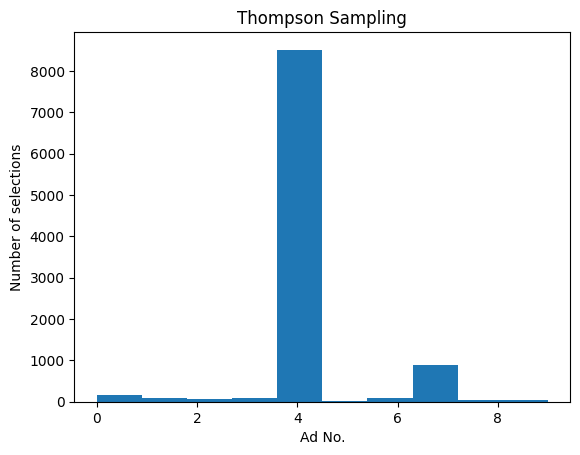

In [11]:
plt.hist(ads_selected)
plt.title('Thompson Sampling')
plt.xlabel('Ad No.')
plt.ylabel('Number of selections')
plt.show()